In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df_long = pd.read_csv('oasis_longitudinal.csv')
df_long.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
df_long.drop(df_long.columns[[0,1,3,4,6]], axis = 1, inplace = True) 
df_long.head()
df_long['SES'].fillna((round(df_long['SES'].mean())), inplace=True)
df_long['MMSE'].fillna((round(df_long['MMSE'].mean())), inplace=True)
df_long['CDR'].fillna((round(df_long['CDR'].mean())), inplace=True)
df_long['eTIV'].fillna((round(df_long['eTIV'].mean())), inplace=True)
df_long['nWBV'].fillna((round(df_long['nWBV'].mean())), inplace=True)
df_long['ASF'].fillna((round(df_long['ASF'].mean())), inplace=True)
df_long['M/F'] = df_long['M/F'].replace('F', 1)
df_long['M/F'] = df_long['M/F'].replace('M', 0)
df_long['Group'] = df_long['Group'].replace('Demented', 1)
df_long['Group'] = df_long['Group'].replace('Nondemented', 0)
df_long['Group'] = df_long['Group'].replace('Converted', 2)

In [4]:
df_long.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,0,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,0,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,0,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [5]:
array=df_long.values
X = array[:,[1,2,3,4,5,6,7,8,9]]
Y = array[:,0]
X_train, X_test, y_train,y_test=train_test_split(X,Y,random_state=10,test_size=0.2)

In [6]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)
# We can create Python dictionary using [] or dict()
scores = []
# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(X_train, y_train)
 y_pred = knn.predict(X_test)
 scores.append(accuracy_score(y_test, y_pred))
print(scores)


[0.7066666666666667, 0.68, 0.6666666666666666, 0.64, 0.64, 0.6933333333333334, 0.6533333333333333, 0.6533333333333333, 0.64, 0.6266666666666667, 0.6133333333333333, 0.6533333333333333, 0.6266666666666667, 0.6533333333333333, 0.6533333333333333, 0.6266666666666667, 0.64, 0.64, 0.6266666666666667, 0.6133333333333333, 0.5866666666666667, 0.5466666666666666, 0.5866666666666667, 0.56, 0.5733333333333334]


Text(0, 0.5, 'Testing Accuracy')

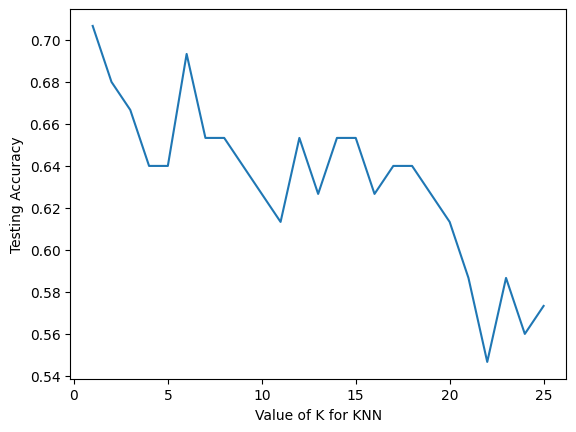

In [7]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt
# allow plots to appear within the notebook
%matplotlib inline
# plot the relationship between K and testing accuracy
39
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
classifier=KNeighborsClassifier(n_neighbors=6,p=2,metric='euclidean')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [11]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[34  0  1]
 [ 3 32  1]
 [ 1  2  1]]


In [12]:
print(accuracy_score(y_test,y_pred))

0.8933333333333333


In [13]:
import joblib
# Assuming 'classifier' is your trained KNeighborsClassifier model
joblib.dump(classifier, 'model.pkl')

['model.pkl']

In [2]:
import joblib
import numpy as np

In [3]:
classifier = joblib.load('model.pkl')

In [4]:
from flask import Flask, render_template, request, jsonify, redirect, url_for
from werkzeug.wrappers import Request, Response

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('one.html')

@app.route('/one_set', methods=['GET'])
def one_set():
    global age, EDUC
    name = request.args.get('name','')
    age = request.args.get('age','')
    EDUC = request.args.get('yoe','')
    return render_template('two.html')

@app.route('/two_set', methods=['GET'])
def two_set():
    global SES, MMSE, CDR
    SES = request.args.get('ses','')
    MMSE = request.args.get('mmse','')
    CDR = request.args.get('cdr','')
    return render_template('three.html')

@app.route('/third_set', methods=['GET'])
def third_set():
    global EDUC, SES, MMSE, CDR, age
    gender = request.args.get('gender', '')
    eTIV = request.args.get('etiv', '')
    nWBV = request.args.get('nwbv', '')
    ASF = request.args.get('asf', '')

    # Prepare the input data
    tp = [EDUC, SES, MMSE, CDR, gender, age, eTIV, nWBV, ASF]
    tp = np.array(tp).astype(float).reshape(1, -1)
    value = classifier.predict(tp)[0]

    # Render the appropriate result template
    if value == 0:
        return render_template('result2.html')
    else:
        return render_template('result1.html')


@app.route("/home")
def home():
    return render_template('one.html')

if __name__ == '__main__':
    from werkzeug.serving import run_simple
    run_simple('localhost', 5000, app)
    #app.run(host='localhost',port=5000, debug=True,threaded=True)


 * Running on http://localhost:5000 (Press CTRL+C to quit)
127.0.0.1 - - [24/Jun/2024 13:55:05] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/Jun/2024 13:55:10] "GET /one_set?name=anu&age=88&yoe=14 HTTP/1.1" 200 -
127.0.0.1 - - [24/Jun/2024 13:55:13] "GET /two_set?ses=2&mmse=27&cdr=0 HTTP/1.1" 200 -
127.0.0.1 - - [24/Jun/2024 13:55:16] "GET /third_set?etiv=1987&nwbv=0.696&asf=0.883&gender=0 HTTP/1.1" 200 -
